In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # eller en anden model
import os
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




#### INDLÆST DATA:

In [3]:
df = pd.read_csv('students_dropout_academic_success.csv')

In [4]:
df['Nacionality'].unique()

array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105,  14,  17], dtype=int64)

In [5]:
# Se de første rækker
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### RENSER DATA:

In [7]:
#Info om datatyper.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
df['target'] = df['target'].replace({
    'Graduate': 0,
    'Dropout': 1,
    'Enrolled': 2
})

C:\Users\danie\AppData\Local\Temp\ipykernel_16032\3617272698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({


In [9]:
df = df.astype(float).round(2)

In [10]:
#Info om datatyper.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   float64
 1   Application mode                                4424 non-null   float64
 2   Application order                               4424 non-null   float64
 3   Course                                          4424 non-null   float64
 4   Daytime/evening attendance                      4424 non-null   float64
 5   Previous qualification                          4424 non-null   float64
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   float64
 8   Mother's qualification                          4424 non-null   float64
 9   Father's qualification                   

In [11]:
# tjekker om manglende data 
df.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [12]:
df.duplicated().sum()


0

# Exploratory feature selection process:

## Globale træning- og testset 

In [15]:
# Split data globalt
X = df.drop('target', axis=1)
y = df['target']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

## Random Forest Classifier

In [17]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest performance:")
print(classification_report(y_test, y_pred_rf))



Random Forest performance:
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86       442
         1.0       0.83      0.79      0.81       284
         2.0       0.67      0.36      0.47       159

    accuracy                           0.79       885
   macro avg       0.76      0.70      0.71       885
weighted avg       0.78      0.79      0.77       885



### Confusion matrix for random Forest

The confusion matrix for Random Forest shows strong performance in identifying "Graduate" and "Dropout" students. However, the model struggles with predicting the "Enrolled" class correctly, as many of them are misclassified as "Graduate" or "Dropout". This could be due to overlapping patterns or limited distinction in features for this group.

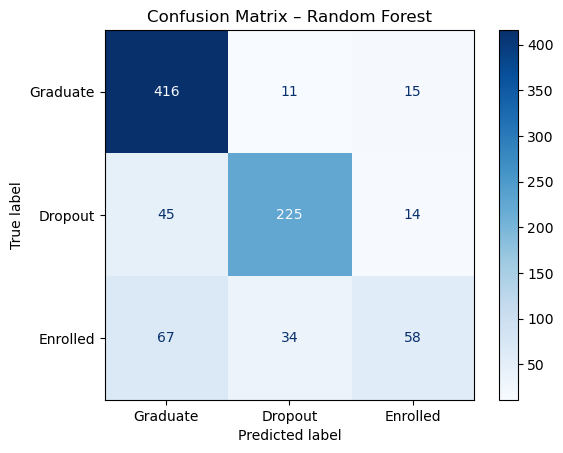

In [20]:

y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                                 display_labels=['Graduate', 'Dropout', 'Enrolled'])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.show()


## Feature importance fra Random Forest

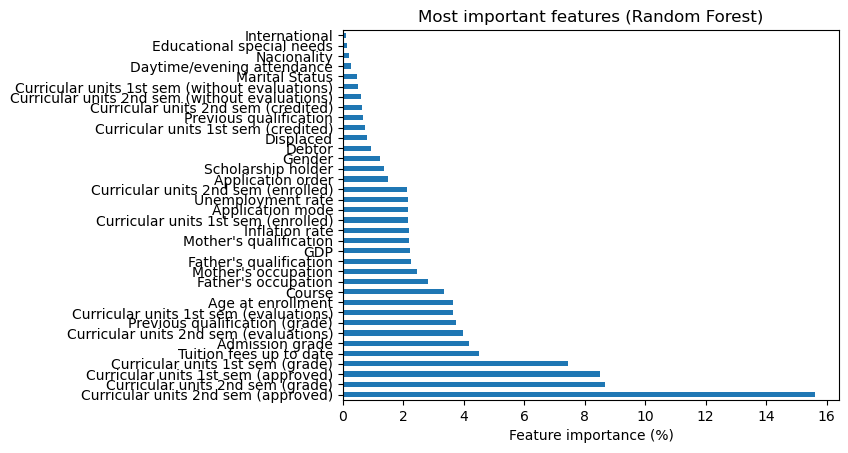

In [22]:
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance = feat_importance.nlargest(40) * 100  # fra decimal til procent
feat_importance.plot(kind='barh')
plt.xlabel("Feature importance (%)")
plt.title("Most important features (Random Forest)")
plt.show()


## Feature og importance i procent

In [24]:

feat_table = feat_importance.reset_index()
feat_table.columns = ['Feature', 'Importance (%)']



## Vis som tabel

In [26]:
feat_table.sort_values(by='Importance (%)', ascending=False).style.background_gradient(cmap='YlGn')

,Feature,Importance (%)
0,Curricular units 2nd sem (approved),15.629146
1,Curricular units 2nd sem (grade),8.656114
2,Curricular units 1st sem (approved),8.516826
3,Curricular units 1st sem (grade),7.457161
4,Tuition fees up to date,4.486966
5,Admission grade,4.166947
6,Curricular units 2nd sem (evaluations),3.977018
7,Previous qualification (grade),3.755495
8,Curricular units 1st sem (evaluations),3.646339
9,Age at enrollment,3.639045


# Correlation matrix and Heatmap

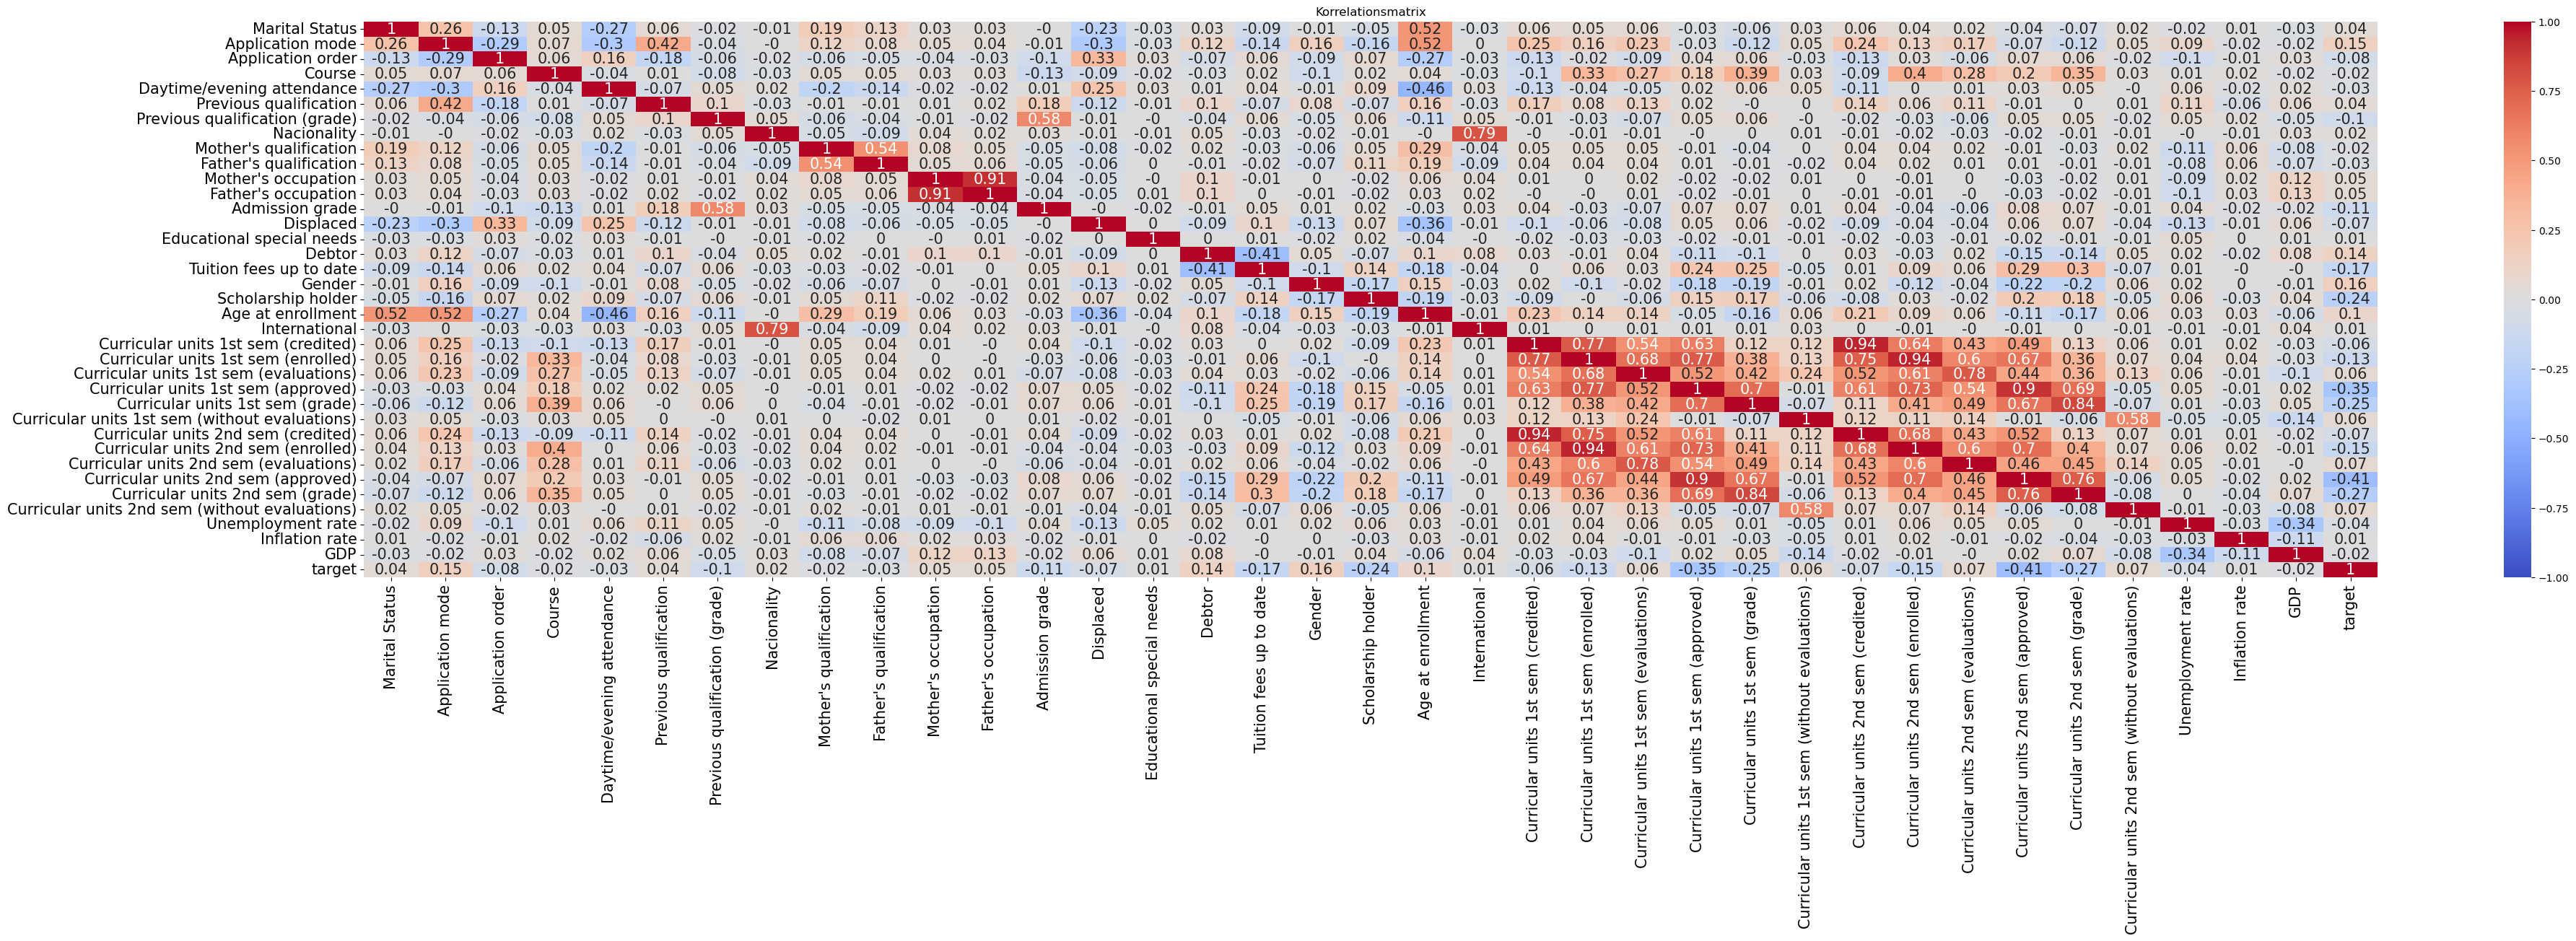

In [28]:
corr_matrix = df.corr().round(2)

plt.figure(figsize=(45,10))
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1,  annot_kws={"fontsize":15})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
plt.title("Korrelationsmatrix")
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   float64
 1   Application mode                                4424 non-null   float64
 2   Application order                               4424 non-null   float64
 3   Course                                          4424 non-null   float64
 4   Daytime/evening attendance                      4424 non-null   float64
 5   Previous qualification                          4424 non-null   float64
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   float64
 8   Mother's qualification                          4424 non-null   float64
 9   Father's qualification                   

# Dropping irrelevant features

In [31]:
drop_columns = [
    "Application order",
    "Scholarship holder",
    "Gender",
    "Debtor",
    "Displaced",
    "Curricular units 1st sem (credited)",
    "Curricular units 2nd sem (credited)",
    "Previous qualification",
    "Curricular units 2nd sem (without evaluations)",
    "Curricular units 1st sem (without evaluations)",
    "Marital Status",
    "Daytime/evening attendance",
    "Nacionality",
    "International",
    "Educational special needs"
]

df = df.drop(columns=drop_columns)


In [32]:
df.head()

,Application mode,Course,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Tuition fees up to date,Age at enrollment,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,target
0,17.0,171.0,122.0,19.0,12.0,5.0,9.0,127.3,1.0,20.0,...,0.0,0.00,0.0,0.0,0.0,0.00,10.8,1.4,1.74,1.0
1,15.0,9254.0,160.0,1.0,3.0,3.0,3.0,142.5,0.0,19.0,...,6.0,14.00,6.0,6.0,6.0,13.67,13.9,-0.3,0.79,0.0
2,1.0,9070.0,122.0,37.0,37.0,9.0,9.0,124.8,0.0,19.0,...,0.0,0.00,6.0,0.0,0.0,0.00,10.8,1.4,1.74,1.0
3,17.0,9773.0,122.0,38.0,37.0,5.0,3.0,119.6,1.0,20.0,...,6.0,13.43,6.0,10.0,5.0,12.40,9.4,-0.8,-3.12,0.0
4,39.0,8014.0,100.0,37.0,38.0,9.0,9.0,141.5,1.0,45.0,...,5.0,12.33,6.0,6.0,6.0,13.00,13.9,-0.3,0.79,0.0


# Global training- and testset from updated df

In [34]:

# Split data globalt
X = df.drop('target', axis=1)
y = df['target']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# Opret DataFrame med feature og importance i procent

In [36]:

feat_table = feat_importance.reset_index()
feat_table.columns = ['Feature', 'Importance (%)']



# Correlation matrix and Heatmap of new dataset

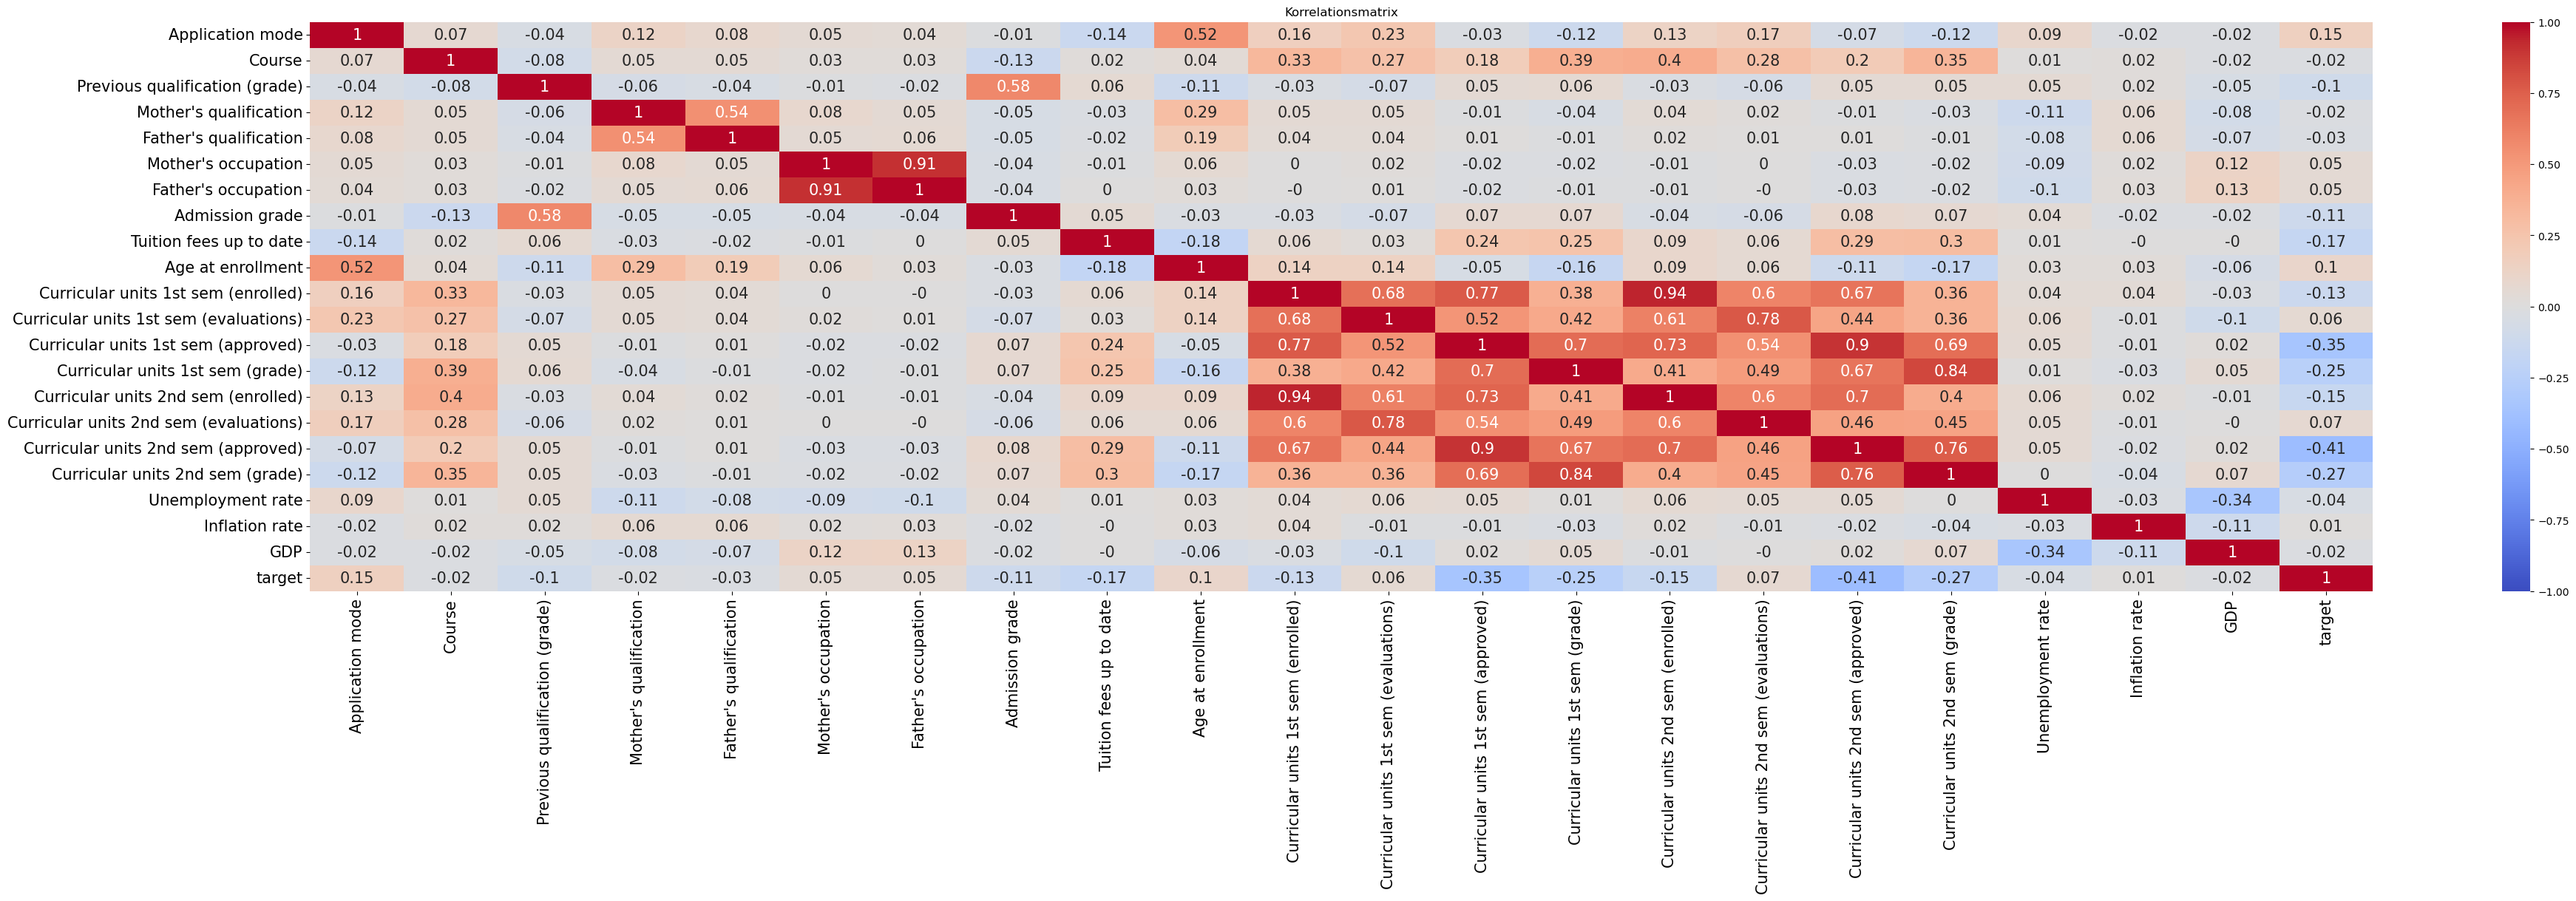

In [38]:
corr_matrix = df.corr().round(2)

plt.figure(figsize=(45,10))
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1,  annot_kws={"fontsize":15})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
plt.title("Korrelationsmatrix")
plt.show()

# Descriptive analysis 

In [40]:
df.describe().round(2)

,Application mode,Course,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Tuition fees up to date,Age at enrollment,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,target
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,18.67,8856.64,132.61,19.56,22.28,10.96,11.03,126.98,0.88,23.27,...,4.71,10.64,6.23,8.06,4.44,10.23,11.57,1.23,0.00,0.68
std,17.48,2063.57,13.19,15.60,15.34,26.42,25.26,14.48,0.32,7.59,...,3.09,4.84,2.20,3.95,3.01,5.21,2.66,1.38,2.27,0.76
min,1.00,33.00,95.00,1.00,1.00,0.00,0.00,95.00,0.00,17.00,...,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06,0.00
25%,1.00,9085.00,125.00,2.00,3.00,4.00,4.00,117.90,1.00,19.00,...,3.00,11.00,5.00,6.00,2.00,10.75,9.40,0.30,-1.70,0.00
50%,17.00,9238.00,133.10,19.00,19.00,5.00,7.00,126.10,1.00,20.00,...,5.00,12.29,6.00,8.00,5.00,12.20,11.10,1.40,0.32,1.00
75%,39.00,9556.00,140.00,37.00,37.00,9.00,9.00,134.80,1.00,25.00,...,6.00,13.40,7.00,10.00,6.00,13.33,13.90,2.60,1.79,1.00
max,57.00,9991.00,190.00,44.00,44.00,194.00,195.00,190.00,1.00,70.00,...,26.00,18.88,23.00,33.00,20.00,18.57,16.20,3.70,3.51,2.00


# How does grade and students' number of completed courses correlate to target?

## Conclusion – 1st Semester
Grades:
Students who graduate generally have higher grades in the first semester.
Dropouts have clearly lower median grades and more variation.
The histogram shows a clear shift towards lower grades for dropouts.

Passed courses:
Graduates pass more subjects on average in the first semester.
Many dropouts pass very few or no subjects at all.
The boxplot shows a clear skew for dropouts when it comes to passed subjects.

Conclusion:
Poor academic performance in the first semester is strongly connected to dropout.

## Conclusion – 2nd Semester
Grades:
The same pattern continues: Graduates keep their grades high, while dropouts have lower and more spread out grades.
The histogram shows that many dropouts have grades close to zero.

Passed courses:
Graduates pass a higher number of subjects in the second semester.
Dropouts either have a very low pass rate or no passed subjects, which seems like a critical indicator.

Conclusion:
Also in the second semester, low grades and low study activity are clearly connected to dropout. Lack of academic progress seems to be a key factor for dropping out.

### Overall Conclusion
Dropouts are consistently different from graduates – they have lower average grades and pass fewer courses in both the 1st and 2nd semester. This supports our hypothesis that academic performance early in the study is very important for completing the education.

### 1st semester

C:\Users\danie\AppData\Local\Temp\ipykernel_16032\3757591861.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='target', y='Curricular units 1st sem (grade)', palette='pastel')
C:\Users\danie\AppData\Local\Temp\ipykernel_16032\3757591861.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='target', y='Curricular units 1st sem (approved)', palette='pastel')


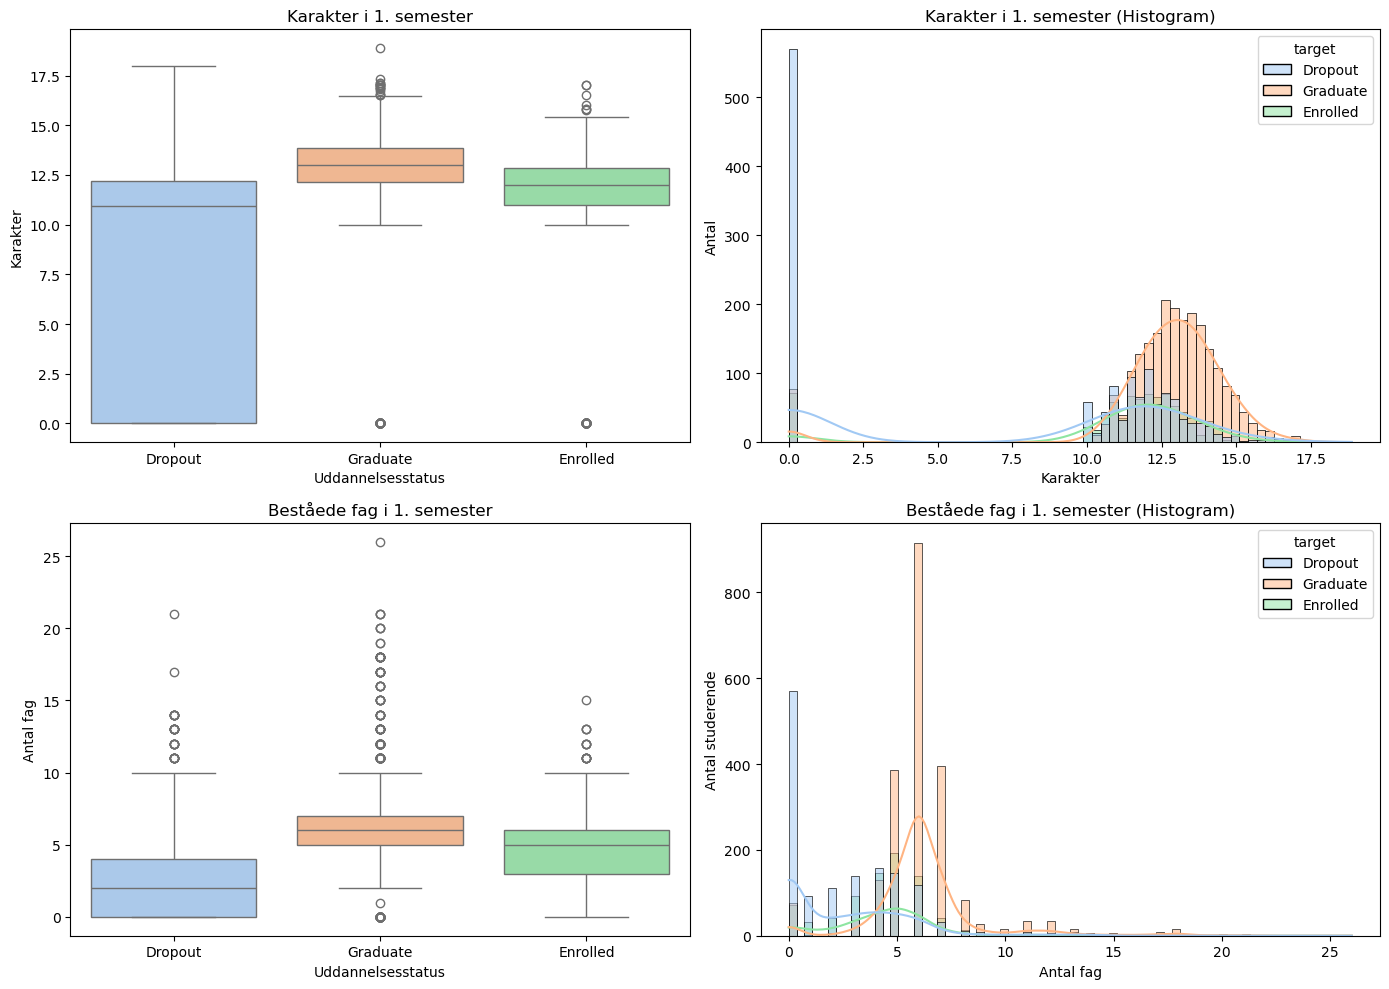

In [44]:
# Sørg for at target er i tekst
df['target'] = df['target'].replace({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})

# Filtrer kun på Dropout og Graduate
filtered_df = df[df['target'].isin(['Dropout', 'Graduate', 'Enrolled'])]

# --- PLOTS ---

plt.figure(figsize=(14, 10))

# Boxplot: Karakter i 1. semester
plt.subplot(2, 2, 1)
sns.boxplot(data=filtered_df, x='target', y='Curricular units 1st sem (grade)', palette='pastel')
plt.title('Karakter i 1. semester')
plt.xlabel('Uddannelsesstatus')
plt.ylabel('Karakter')

# Histogram: Karakter i 1. semester
plt.subplot(2, 2, 2)
sns.histplot(data=filtered_df, x='Curricular units 1st sem (grade)', hue='target', kde=True, palette='pastel')
plt.title('Karakter i 1. semester (Histogram)')
plt.xlabel('Karakter')
plt.ylabel('Antal')

# Boxplot: Antal beståede fag i 1. semester
plt.subplot(2, 2, 3)
sns.boxplot(data=filtered_df, x='target', y='Curricular units 1st sem (approved)', palette='pastel')
plt.title('Beståede fag i 1. semester')
plt.xlabel('Uddannelsesstatus')
plt.ylabel('Antal fag')

# Histogram: Beståede fag i 1. semester
plt.subplot(2, 2, 4)
sns.histplot(data=filtered_df, x='Curricular units 1st sem (approved)', hue='target', kde=True, palette='pastel')
plt.title('Beståede fag i 1. semester (Histogram)')
plt.xlabel('Antal fag')
plt.ylabel('Antal studerende')

plt.tight_layout()
plt.show()

### 2nd semester

C:\Users\danie\AppData\Local\Temp\ipykernel_16032\3447023490.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='target', y='Curricular units 2nd sem (grade)', palette='pastel')
C:\Users\danie\AppData\Local\Temp\ipykernel_16032\3447023490.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='target', y='Curricular units 2nd sem (approved)', palette='pastel')


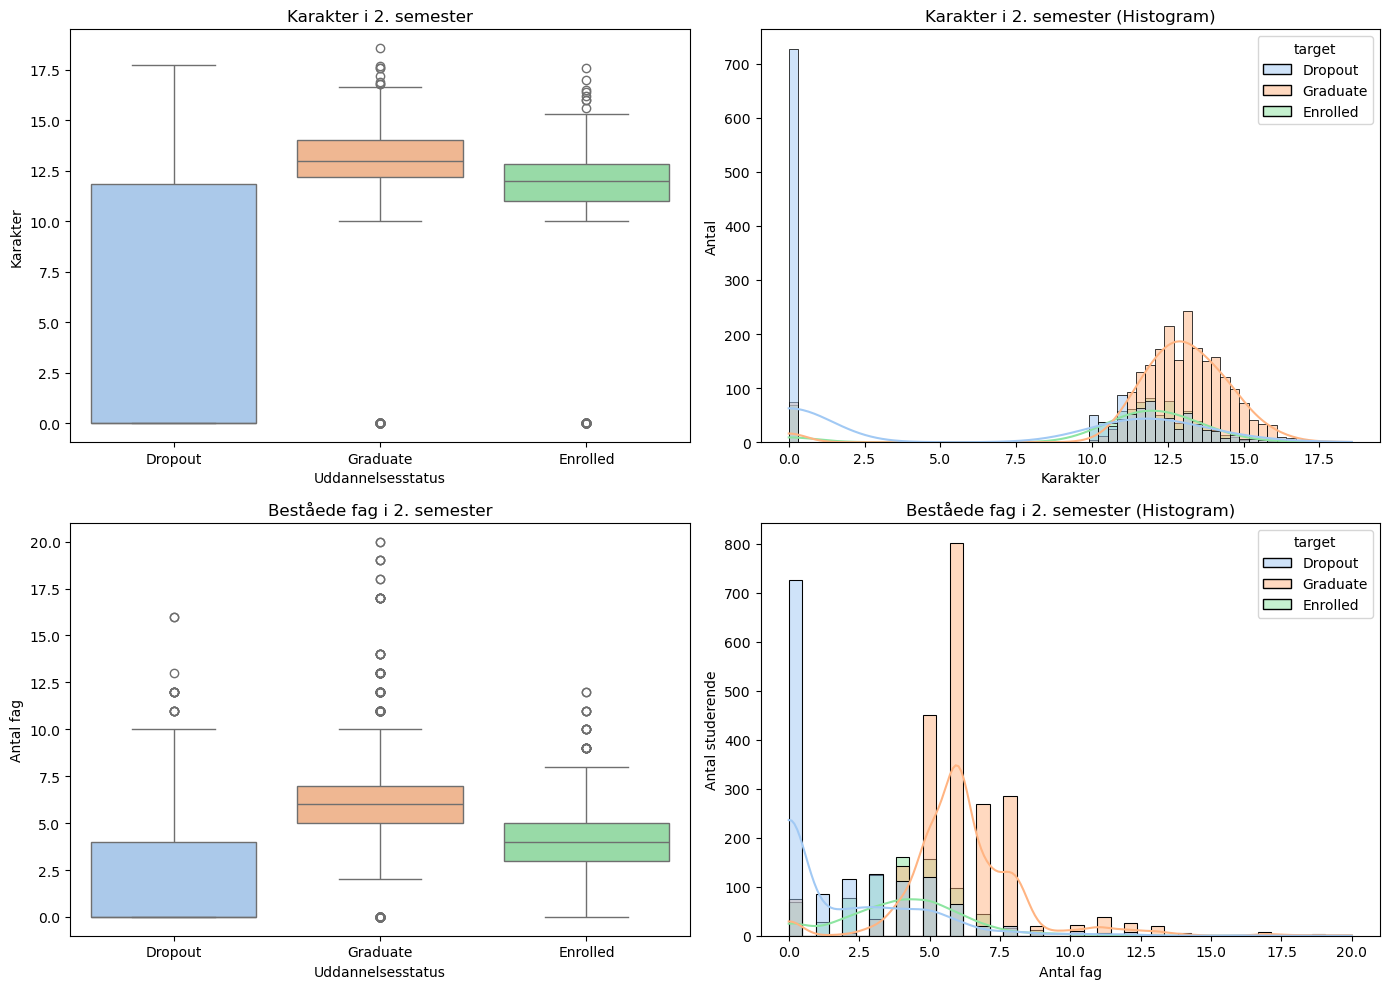

In [46]:
# Sørg for at target er i tekst
df['target'] = df['target'].replace({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})

# Filtrer alle tre kategorier
filtered_df = df[df['target'].isin(['Dropout', 'Graduate', 'Enrolled'])]

# --- PLOTS ---

plt.figure(figsize=(14, 10))

# Boxplot: Karakter i 2. semester
plt.subplot(2, 2, 1)
sns.boxplot(data=filtered_df, x='target', y='Curricular units 2nd sem (grade)', palette='pastel')
plt.title('Karakter i 2. semester')
plt.xlabel('Uddannelsesstatus')
plt.ylabel('Karakter')

# Histogram: Karakter i 2. semester
plt.subplot(2, 2, 2)
sns.histplot(data=filtered_df, x='Curricular units 2nd sem (grade)', hue='target', kde=True, palette='pastel')
plt.title('Karakter i 2. semester (Histogram)')
plt.xlabel('Karakter')
plt.ylabel('Antal')

# Boxplot: Antal beståede fag i 2. semester
plt.subplot(2, 2, 3)
sns.boxplot(data=filtered_df, x='target', y='Curricular units 2nd sem (approved)', palette='pastel')
plt.title('Beståede fag i 2. semester')
plt.xlabel('Uddannelsesstatus')
plt.ylabel('Antal fag')

# Histogram: Antal beståede fag i 2. semester
plt.subplot(2, 2, 4)
sns.histplot(data=filtered_df, x='Curricular units 2nd sem (approved)', hue='target', kde=True, palette='pastel')
plt.title('Beståede fag i 2. semester (Histogram)')
plt.xlabel('Antal fag')
plt.ylabel('Antal studerende')

plt.tight_layout()
plt.show()


# Does economic background and age play a role in dropout?

## Age at enrollment
Boxplot:
Dropouts have a higher median age compared to graduates.
More dropout students are older when they start their studies, with a clear overrepresentation in the 25+ age group.
Graduates are typically younger and more concentrated in age.

Histogram:
Graduates peak around age 18–21, while dropouts show a wider and flatter age distribution.
Many dropouts start later in life, which might suggest more responsibilities (job, children, economy).

Interpretation:
Age at enrollment seems to be a risk factor for dropout – especially for students who start later than the average.

###  Economic background (Tuition fees up to date)
Countplot:
A larger share of dropouts have not paid their tuition fees on time (value = 0).
Graduates are much more likely to have paid their fees on time (value = 1).

Interpretation:
Financial instability – measured by unpaid tuition – is associated with higher dropout risk.

###  Conclusion
Both age and economic situation appear to influence student dropout.
Students who start later in life and/or are not up-to-date with tuition payments have a higher risk of dropping out.
These factors should be considered in predictive models and when designing support systems for students.

# Age at enrollment and Tuition fees payment up to date

C:\Users\danie\AppData\Local\Temp\ipykernel_16032\2156483745.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='target', y='Age at enrollment', palette='coolwarm')


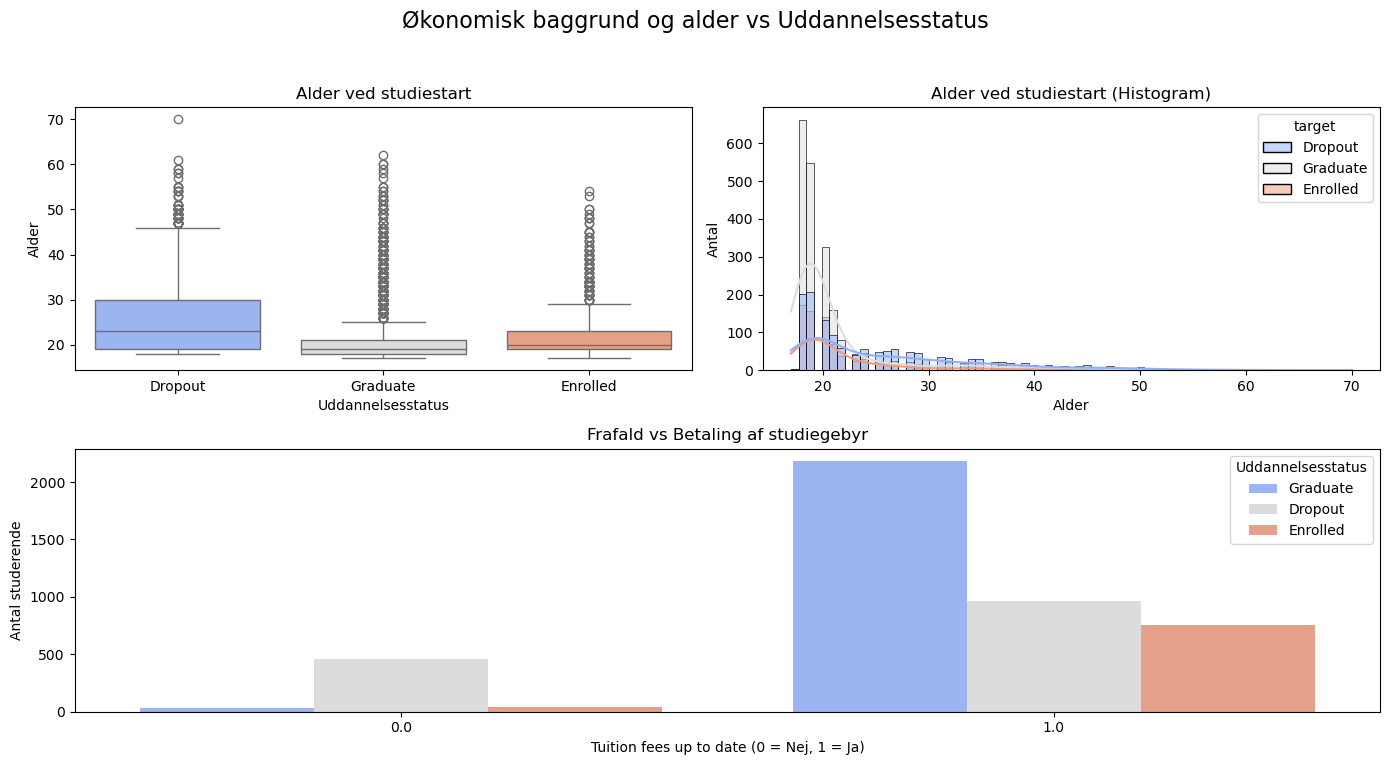

In [50]:
# Sørg for at target er i tekst
df['target'] = df['target'].replace({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})

# Filtrer kun på Dropout og Graduate
filtered_df = df[df['target'].isin(['Dropout', 'Graduate', 'Enrolled'])]

# Setup plot
plt.figure(figsize=(14, 8))
plt.suptitle("Økonomisk baggrund og alder vs Uddannelsesstatus", fontsize=16)

# Boxplot: Age at enrollment
plt.subplot(2, 2, 1)
sns.boxplot(data=filtered_df, x='target', y='Age at enrollment', palette='coolwarm')
plt.title('Alder ved studiestart')
plt.xlabel('Uddannelsesstatus')
plt.ylabel('Alder')

# Histogram: Age at enrollment
plt.subplot(2, 2, 2)
sns.histplot(data=filtered_df, x='Age at enrollment', hue='target', kde=True, palette='coolwarm')
plt.title('Alder ved studiestart (Histogram)')
plt.xlabel('Alder')
plt.ylabel('Antal')

# Countplot: Tuition fees up to date
plt.subplot(2, 1, 2)
sns.countplot(data=filtered_df, x='Tuition fees up to date', hue='target', palette='coolwarm')
plt.title('Frafald vs Betaling af studiegebyr')
plt.xlabel('Tuition fees up to date (0 = Nej, 1 = Ja)')
plt.ylabel('Antal studerende')
plt.legend(title='Uddannelsesstatus')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Hypotese 1: Akademisk performance

##### Change target to float 

In [53]:
df['target'] = df['target'].replace({
    'Graduate': 0,
    'Dropout': 1,
    'Enrolled': 2
}).astype(float)

C:\Users\danie\AppData\Local\Temp\ipykernel_16032\3858964095.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({


##### Check if success 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Application mode                        4424 non-null   float64
 1   Course                                  4424 non-null   float64
 2   Previous qualification (grade)          4424 non-null   float64
 3   Mother's qualification                  4424 non-null   float64
 4   Father's qualification                  4424 non-null   float64
 5   Mother's occupation                     4424 non-null   float64
 6   Father's occupation                     4424 non-null   float64
 7   Admission grade                         4424 non-null   float64
 8   Tuition fees up to date                 4424 non-null   float64
 9   Age at enrollment                       4424 non-null   float64
 10  Curricular units 1st sem (enrolled)     4424 non-null   floa

# ANOVA på karakterer

In [57]:
# Karakterer i 1. semester fordelt på 3 grupper
grades_dropout = df[df['target'] == 1]['Curricular units 1st sem (grade)']
grades_graduate = df[df['target'] == 0]['Curricular units 1st sem (grade)']
grades_enrolled = df[df['target'] == 2]['Curricular units 1st sem (grade)']

# Kør ANOVA
f_stat, p_val = f_oneway(grades_dropout, grades_graduate, grades_enrolled)

print("ANOVA: Karakterer i 1. semester")
print("F-statistik:", round(f_stat, 3))
print("P-værdi:", round(p_val, 4))

if p_val < 0.05:
    print("→ Der er signifikant forskel mellem mindst to grupper.")
else:
    print("→ Der er ingen signifikant forskel mellem grupperne.")


ANOVA: Karakterer i 1. semester
F-statistik: 713.519
P-værdi: 0.0
→ Der er signifikant forskel mellem mindst to grupper.


# ANOVA for beståede fag

In [59]:
approved_dropout = df[df['target'] == 1]['Curricular units 1st sem (approved)']
approved_graduate = df[df['target'] == 0]['Curricular units 1st sem (approved)']
approved_enrolled = df[df['target'] == 2]['Curricular units 1st sem (approved)']

f_stat, p_val = f_oneway(approved_dropout, approved_graduate, approved_enrolled)

print("ANOVA: Beståede fag i 1. semester")
print("F-statistik:", round(f_stat, 3))
print("P-værdi:", round(p_val, 4))

if p_val < 0.05:
    print("→ Der er signifikant forskel mellem mindst to grupper.")
else:
    print("→ Der er ingen signifikant forskel.")


ANOVA: Beståede fag i 1. semester
F-statistik: 859.867
P-værdi: 0.0
→ Der er signifikant forskel mellem mindst to grupper.


# Hypotese 2: Økonomiske forhold

# Conclusion – Hypothesis 2: Economic Conditions and Student Dropout
Based on my ANOVA analysis, I found that there is a statistically significant difference in both GDP and unemployment rate across the three groups of students: Graduate, Dropout, and Enrolled. However, no significant difference was found in the inflation rate.

### GDP (Gross Domestic Product):
F-statistic: 4.799

P-value: 0.0083
This indicates that economic growth plays a role in student outcomes. Students who dropped out were more likely to come from periods with lower national GDP, which may reflect economic instability or fewer resources available.

### Unemployment Rate:
F-statistic: 5.923

P-value: 0.0027
The unemployment rate is also significantly different between the groups, suggesting that higher unemployment may contribute to increased dropout rates. This could be due to financial stress or a more uncertain job market.

### Inflation Rate:
F-statistic: 1.742

P-value: 0.1753
The analysis showed no statistically significant difference in inflation across the groups. This means that, unlike GDP and unemployment, inflation does not appear to directly affect whether students drop out or graduate in this dataset.

## Final Conclusion:
My findings support the hypothesis that macroeconomic conditions do influence student dropout. In particular, lower GDP and higher unemployment are associated with a greater likelihood of dropping out.
Inflation, on the other hand, does not seem to have a measurable effect in this case.

In [62]:

# GDP
gdp_dropout = df[df['target'] == 1]['GDP'].dropna()
gdp_graduate = df[df['target'] == 0]['GDP'].dropna()
gdp_enrolled = df[df['target'] == 2]['GDP'].dropna()

f_stat_gdp, p_val_gdp = f_oneway(gdp_dropout, gdp_graduate, gdp_enrolled)

print("ANOVA: BNP (GDP)")
print("F-statistik:", round(f_stat_gdp, 3))
print("P-værdi:", round(p_val_gdp, 4))
if p_val_gdp < 0.05:
    print("→ Der er signifikant forskel i BNP mellem grupperne.")
else:
    print("→ Ingen signifikant forskel i BNP.")
print()

# Unemployment rate
unemp_dropout = df[df['target'] == 1]['Unemployment rate'].dropna()
unemp_graduate = df[df['target'] == 0]['Unemployment rate'].dropna()
unemp_enrolled = df[df['target'] == 2]['Unemployment rate'].dropna()

f_stat_unemp, p_val_unemp = f_oneway(unemp_dropout, unemp_graduate, unemp_enrolled)

print("ANOVA: Arbejdsløshed")
print("F-statistik:", round(f_stat_unemp, 3))
print("P-værdi:", round(p_val_unemp, 4))
if p_val_unemp < 0.05:
    print("→ Der er signifikant forskel i arbejdsløshed mellem grupperne.")
else:
    print("→ Ingen signifikant forskel i arbejdsløshed.")
print()

# Inflation
inflation_dropout = df[df['target'] == 1]['Inflation rate'].dropna()
inflation_graduate = df[df['target'] == 0]['Inflation rate'].dropna()
inflation_enrolled = df[df['target'] == 2]['Inflation rate'].dropna()

f_stat_inflation, p_val_inflation = f_oneway(inflation_dropout, inflation_graduate, inflation_enrolled)

print("ANOVA: Inflation")
print("F-statistik:", round(f_stat_inflation, 3))
print("P-værdi:", round(p_val_inflation, 4))
if p_val_inflation < 0.05:
    print("→ Der er signifikant forskel i inflation mellem grupperne.")
else:
    print("→ Ingen signifikant forskel i inflation.")


ANOVA: BNP (GDP)
F-statistik: 4.799
P-værdi: 0.0083
→ Der er signifikant forskel i BNP mellem grupperne.

ANOVA: Arbejdsløshed
F-statistik: 5.923
P-værdi: 0.0027
→ Der er signifikant forskel i arbejdsløshed mellem grupperne.

ANOVA: Inflation
F-statistik: 1.742
P-værdi: 0.1753
→ Ingen signifikant forskel i inflation.


# Hypotese 3: Øvrige nøglefaktorer

# Conclusion – Hypothesis 3: Key Demographic and Background Factors
In this analysis, I investigated whether age at enrollment, previous academic performance, and parental education have a statistically significant effect on whether students drop out, stay enrolled, or graduate.

Using ANOVA, I found significant differences between the groups for all three factors.

### Age at Enrollment:
F-statistic: 154.712

P-value: 0.0000
There is a highly significant difference in age between the three groups. Students who dropped out were generally older at the time of enrollment, which suggests that non-traditional or late-starting students may be more at risk of dropout, possibly due to work, financial, or family obligations.

### Previous Academic Performance:
F-statistic: 27.729

P-value: 0.0000
There is also a clear difference in previous academic grades between groups. Students with lower grades from previous education are more likely to drop out, supporting the idea that past performance is a strong predictor of future success.

###  Father's Education Level:
F-statistic: 3.838

P-value: 0.0216
Although the effect is less strong than age or prior grades, there is still a significant difference in father's education level across the groups. This may indicate that socioeconomic background and parental educational support influence educational outcomes.

## Final Conclusion:
My results support the hypothesis that key background factors – such as age at enrollment, academic history, and family educational background – do influence the likelihood of dropping out. These findings highlight the importance of identifying at-risk students not just by academic performance, but also by demographics and life context.

In [65]:

# Alder ved studiestart
age_dropout = df[df['target'] == 1]['Age at enrollment'].dropna()
age_graduate = df[df['target'] == 0]['Age at enrollment'].dropna()
age_enrolled = df[df['target'] == 2]['Age at enrollment'].dropna()

f_stat_age, p_val_age = f_oneway(age_dropout, age_graduate, age_enrolled)
print("ANOVA: Alder ved studiestart")
print("F-stat:", round(f_stat_age, 3), "P-value:", round(p_val_age, 4))
if p_val_age < 0.05:
    print("→ Der er signifikant forskel i alder.")
else:
    print("→ Ingen signifikant forskel i alder.")
print()

# Tidligere karakterer (fx adgangsgivende karakterer)
prevgrade_dropout = df[df['target'] == 1]['Previous qualification (grade)'].dropna()
prevgrade_graduate = df[df['target'] == 0]['Previous qualification (grade)'].dropna()
prevgrade_enrolled = df[df['target'] == 2]['Previous qualification (grade)'].dropna()

f_stat_prevgrade, p_val_prevgrade = f_oneway(prevgrade_dropout, prevgrade_graduate, prevgrade_enrolled)
print("ANOVA: Tidligere karakterer")
print("F-stat:", round(f_stat_prevgrade, 3), "P-value:", round(p_val_prevgrade, 4))
if p_val_prevgrade < 0.05:
    print("→ Der er signifikant forskel i tidligere karakterer.")
else:
    print("→ Ingen signifikant forskel i tidligere karakterer.")
print()

# Forældres uddannelse/arbejde – fx Father's qualification
fatherqual_dropout = df[df['target'] == 1]["Father's qualification"].dropna()
fatherqual_graduate = df[df['target'] == 0]["Father's qualification"].dropna()
fatherqual_enrolled = df[df['target'] == 2]["Father's qualification"].dropna()

f_stat_fatherqual, p_val_fatherqual = f_oneway(fatherqual_dropout, fatherqual_graduate, fatherqual_enrolled)
print("ANOVA: Fars uddannelse")
print("F-stat:", round(f_stat_fatherqual, 3), "P-value:", round(p_val_fatherqual, 4))
if p_val_fatherqual < 0.05:
    print("→ Der er signifikant forskel i fars uddannelsesniveau.")
else:
    print("→ Ingen signifikant forskel i fars uddannelsesniveau.")


ANOVA: Alder ved studiestart
F-stat: 154.712 P-value: 0.0
→ Der er signifikant forskel i alder.

ANOVA: Tidligere karakterer
F-stat: 27.729 P-value: 0.0
→ Der er signifikant forskel i tidligere karakterer.

ANOVA: Fars uddannelse
F-stat: 3.838 P-value: 0.0216
→ Der er signifikant forskel i fars uddannelsesniveau.


# K-Means (Elbow Method + Silhouette Score)

In [67]:
# Adskil features og target
X = df.drop('target', axis=1)
y = df['target']

# Standardiser features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hvis du vil have det som DataFrame igen (bevarer kolonnenavne)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [68]:
# Adskil features og target
X = df.drop('target', axis=1)
y = df['target']
features = X.columns

# Standardiser hele X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find bedste antal klynger (k) vha. silhouette score
best_k = None
best_score = -1
best_labels = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=7, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

# Tilføj cluster labels til DataFrame
X_kmeans = pd.DataFrame(X, columns=features)
X_kmeans["Cluster"] = best_labels

# Gem modellen
kmeans_model = KMeans(n_clusters=best_k, random_state=7, n_init=10).fit(X_scaled)
joblib.dump(kmeans_model, 'kmeans_model.pkl')

# Print resultater
print("=== K-means Resultater ===")
print("Bedste antal klynger:", best_k)
print("Silhouette score:", round(best_score, 4))


=== K-means Resultater ===
Bedste antal klynger: 4
Silhouette score: 0.2928


#  Visualization of Silhouette Score (Silhouette Plot)

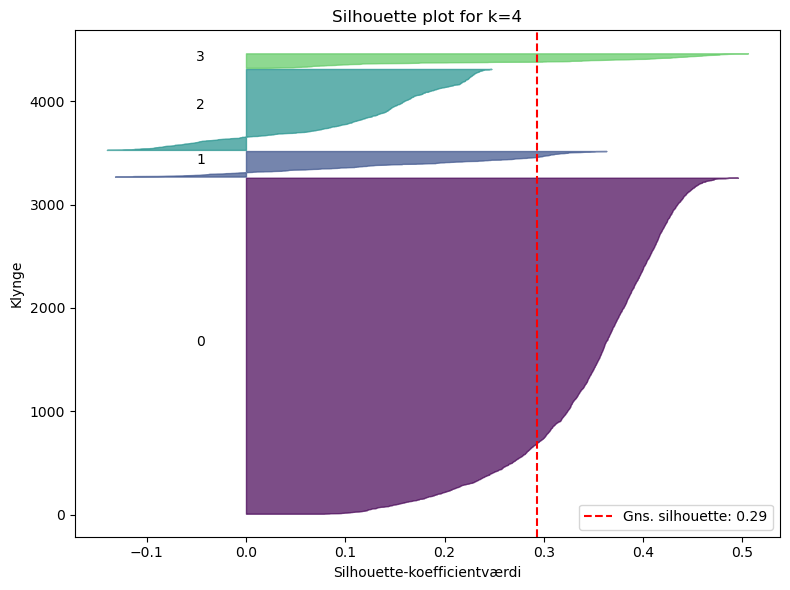

In [70]:
# Brug det skalerede datasæt og labels fra den bedste model
silhouette_vals = silhouette_samples(X_scaled, best_labels)
n_clusters = best_k

# Plot
plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[best_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # mellemrum mellem klynger

# Gennemsnitlig silhouette-score
avg_score = silhouette_score(X_scaled, best_labels)
plt.axvline(avg_score, color="red", linestyle="--", label=f"Gns. silhouette: {avg_score:.2f}")

plt.xlabel("Silhouette-koefficientværdi")
plt.ylabel("Klynge")
plt.title(f"Silhouette plot for k={n_clusters}")
plt.legend()
plt.tight_layout()
plt.show()


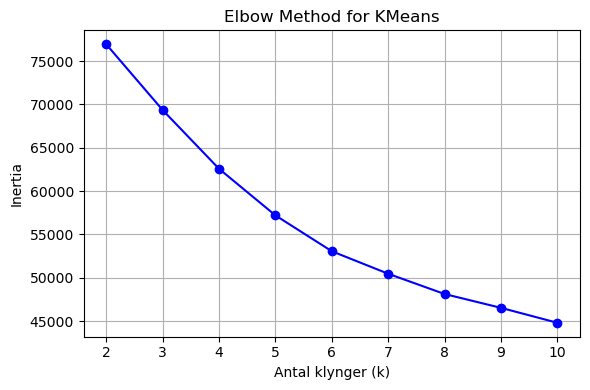

In [71]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=5, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Antal klynger (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.xticks(K)
plt.grid(True)
plt.tight_layout()
plt.show()


# Decision Tree Classifier


## Tolkning:
Graduate: Modellen præsterer bedst her med høj recall (0.87) → dvs. mange gennemførte studerende klassificeres korrekt.

Dropout: Precision er høj (0.86), men recall lavere (0.67) → modellen er god til at identificere sande dropouts, men misser nogle.

Enrolled: Har lav præcision og recall (0.40), hvilket antyder at modellen har svært ved at genkende denne klasse. Dette kan skyldes overlap i karakteristika eller for få data.

## Træstruktur og nøglefaktorer
Baseret på jeres visualisering af beslutningstræet, kan vi udlede følgende:

Curricular units 2nd sem (approved) er den øverste node → dette er den vigtigste feature ift. at splitte studerende.

Andre vigtige variable:

Tuition fees up to date

Curricular units 2nd sem (enrolled)

Curricular units 1st sem (evaluations)

Previous qualification (grade) og GDP

Det matcher jeres tidligere feature importance-analyse – akademisk performance og økonomi er centrale faktorer.

## Konklusion
På baggrund af vores Decision Tree-analyse kan vi konkludere følgende:

Vores model opnår en samlet accuracy på 72%, hvilket er acceptabelt i en uddannelses-kontekst.

Modellen er særligt god til at identificere studerende der gennemfører og studerende der dropper ud.

Klassen Enrolled er markant sværere at forudsige præcist – hvilket kan tyde på, at disse studerende har blandede karakteristika, eller at datagrundlaget er svagere her.

De vigtigste faktorer for modellen er beståede fag og karakterer, samt økonomiske forhold som betaling af studiegebyr og tidligere karakterer.

Denne analyse styrker vores hypoteser om, at akademisk performance og økonomisk stabilitet er stærkt forbundet med frafald, og understøtter brugen af beslutningstræer som et fortolkeligt værktøj til at identificere risikogrupper.

In [74]:
# 1. Træn Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=5)  # Brug max_depth for overskuelighed
dt.fit(X_train, y_train)

# 2. Forudsig og evaluér
y_pred_dt = dt.predict(X_test)
print("Decision Tree performance:")
print(classification_report(y_test, y_pred_dt, target_names=['Graduate', 'Dropout', 'Enrolled']))



Decision Tree performance:
              precision    recall  f1-score   support

    Graduate       0.77      0.87      0.82       442
     Dropout       0.86      0.68      0.76       284
    Enrolled       0.40      0.40      0.40       159

    accuracy                           0.73       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.73      0.72       885



# 3. Visualisér træet

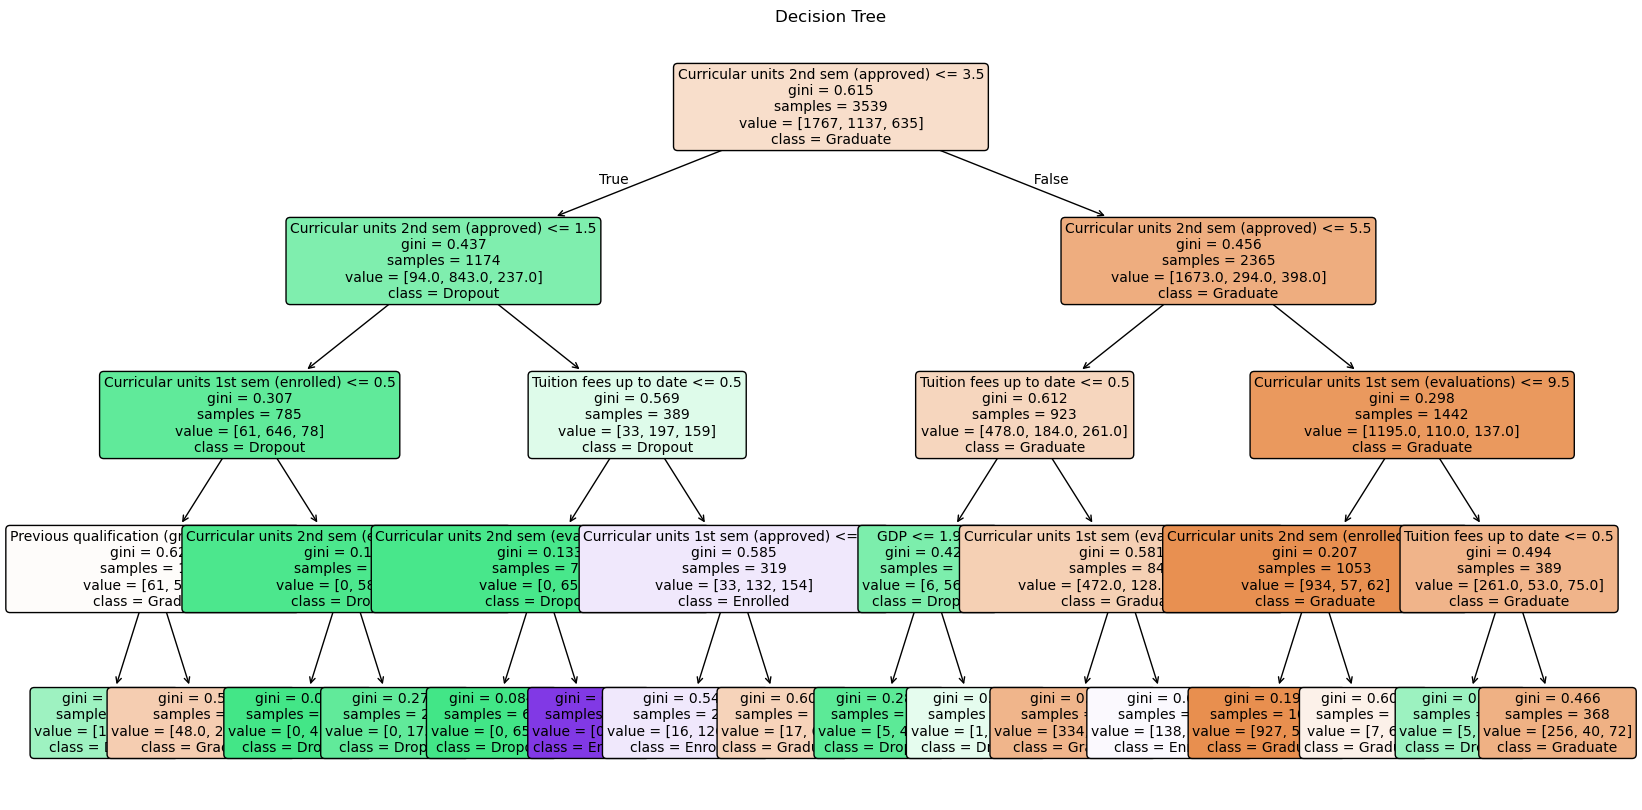

In [76]:

plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=X_train.columns,
          class_names=['Graduate', 'Dropout', 'Enrolled'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree")
plt.show()


# Confusion matrix for Decision Tree

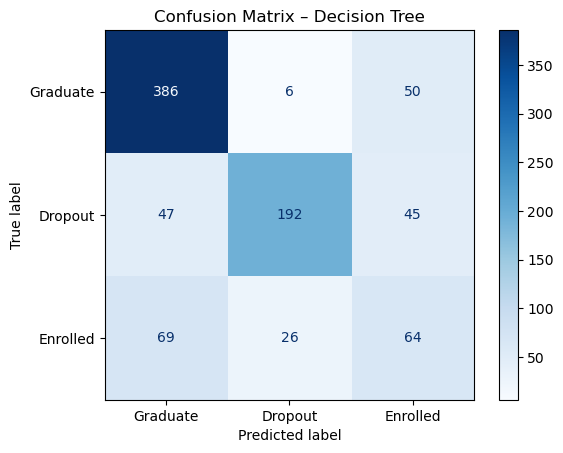

In [78]:

y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                                 display_labels=['Graduate', 'Dropout', 'Enrolled'])
disp_dt.plot(cmap='Blues')
plt.title("Confusion Matrix – Decision Tree")
plt.show()


# KNN med GridSearchCV og validering

# Analysis
After tuning with GridSearchCV, the optimal number of neighbors (k) was found to be 17, yielding a cross-validated accuracy of 72.31% on the training set.

#### Test Performance Summary
Class	Precision	Recall	F1-score	Support
Graduate	0.70	0.95	0.80	442
Dropout	0.88	0.69	0.77	284
Enrolled	0.48	0.18	0.26	159
Overall Accuracy			0.73	885

###  Interpretation
##### Graduate students were predicted with high recall (0.95), meaning the model successfully identified most of them.

##### Dropout class achieved the highest precision (0.88), indicating that when the model predicted dropout, it was usually correct.

##### Enrolled students were much harder to classify, with low recall (0.18) and F1-score (0.26), suggesting overlap with other groups or insufficient distinguishing features.

Although the overall accuracy is solid (73%), the model struggles to distinguish the "Enrolled" group, which may consist of more mixed or uncertain student profiles.

### Conclusion
Based on our KNN classification model, we achieved a reasonably strong performance with an overall accuracy of 73% and high recall for predicting students who graduate.

The results support our hypothesis that academic and background data can predict student status.

KNN performed particularly well for identifying graduates and dropouts, which aligns with our feature importance analysis (e.g. grades and approved courses).

However, predicting enrolled students remains a challenge, possibly due to:

the transitional nature of the group,

overlapping characteristics,

or class imbalance.

This model could still serve as a decision-support tool to flag at-risk students, though future work might explore ensemble models or further feature engineering to improve prediction of the enrolled group.






In [81]:

# 2. Standardiser
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Find det bedste antal naboer (k)
param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# 4. Resultater
best_k = grid.best_params_['n_neighbors']
print("Bedste antal naboer (k):", best_k)
print("Cross-val accuracy:", round(grid.best_score_, 4))

# 5. Evaluer på testdata
best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("\nKNN performance på testdata:")
print(classification_report(y_test, y_pred_knn, target_names=['Graduate', 'Dropout', 'Enrolled']))


Bedste antal naboer (k): 17
Cross-val accuracy: 0.7231

KNN performance på testdata:
              precision    recall  f1-score   support

    Graduate       0.70      0.95      0.80       442
     Dropout       0.88      0.69      0.77       284
    Enrolled       0.48      0.18      0.26       159

    accuracy                           0.73       885
   macro avg       0.68      0.61      0.61       885
weighted avg       0.72      0.73      0.70       885



### Confusion matrix for KNN

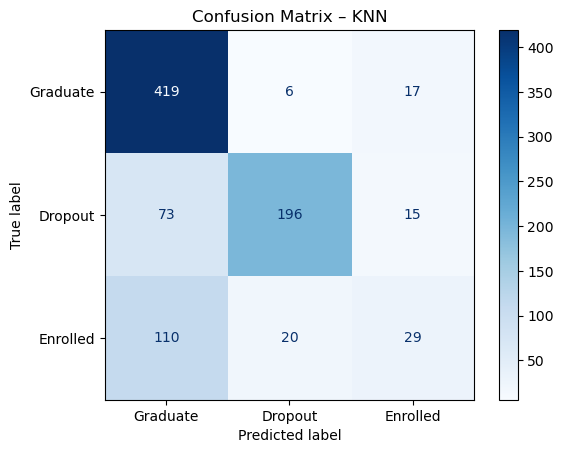

In [83]:
y_pred_knn = best_knn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                                  display_labels=['Graduate', 'Dropout', 'Enrolled'])
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix – KNN")
plt.show()


## Random Forest Classifier

In [126]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest performance:")
print(classification_report(y_test, y_pred_rf))



Random Forest performance:
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.85       442
         1.0       0.83      0.78      0.80       284
         2.0       0.66      0.37      0.47       159

    accuracy                           0.79       885
   macro avg       0.76      0.70      0.71       885
weighted avg       0.78      0.79      0.77       885



### Confusion matrix for random Forest

The confusion matrix for Random Forest shows strong performance in identifying "Graduate" and "Dropout" students. However, the model struggles with predicting the "Enrolled" class correctly, as many of them are misclassified as "Graduate" or "Dropout". This could be due to overlapping patterns or limited distinction in features for this group.

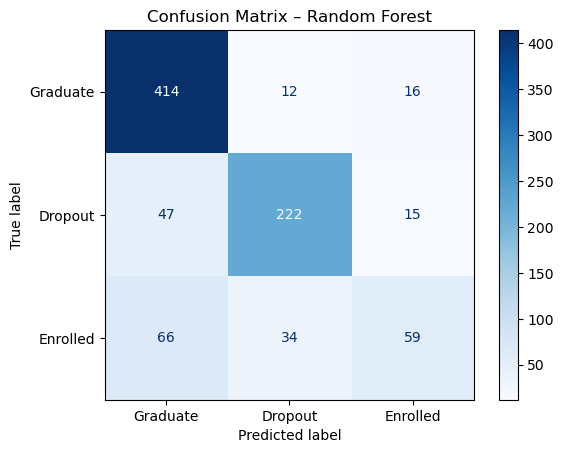

In [130]:

y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                                 display_labels=['Graduate', 'Dropout', 'Enrolled'])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.show()
